Create a convolutional neural network using the helper functions and compare the performance with ResNet50 using transfer learning. This notebook contains two sections.

* Section 1 : Create a CNN
* Section 2 : Transfer Lerarning 

Note: The below assignment to set to run with tensorflow version 2.0 and above.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


## Import Libraries and load cifar10 dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D, MaxPool2D
#from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def load_cifar10_data():
  # Divide the data in Train and Test Datasets
  (x_train,y_train),(x_test,y_test) = cifar10.load_data()
  return (x_train,y_train),(x_test,y_test)

In [ ]:
def convert_to_categorical(y_train, y_test):
  y_train=to_categorical(y_train)
  y_test=to_categorical(y_test)
  return y_train, y_test

In [ ]:
(x_train,y_train),(x_test,y_test) = load_cifar10_data()
y_train, y_test = convert_to_categorical(y_train, y_test)

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
def plot_3_by_3_images():
  # visualize data by plotting images
  fig, ax = plt.subplots(3, 3)
  k = 0
  
  for i in range(3):
      for j in range(3):
          ax[i][j].imshow(x_train[k], aspect='auto')
          k += 1
  
  plt.show()

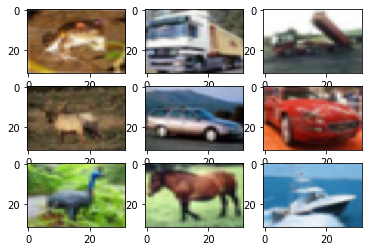

In [ ]:
plot_3_by_3_images()

In [ ]:
display_name = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

def display_image(x, y, index):
    some_image = x[index]
    plt.imshow(some_image, aspect='auto')
    plt.axis('off')
    plt.show()
    label_index = np.argmax(y[index])
    # print(label_index)
    print(display_name.get(label_index))
  


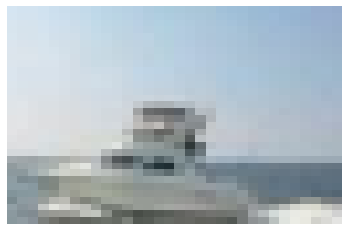

ship


In [ ]:
display_image(x_train, y_train, 100)

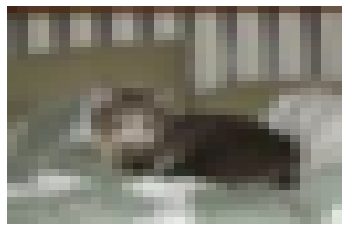

cat


In [ ]:
display_image(x_train, y_train, 150)

## Section 1: Create a convolutional neural network 
Create a convolutional neural network using the helper functions and compare the performance with ResNet50 using transfer learning.


In [ ]:
from tensorflow.python.keras.backend import learning_phase
import keras
num_classes = 10
batch_size= 256
epochs = 15

def create_cnn_model():
    model = Sequential()
    #TODO Define your model here

    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32, 32, 3) ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes))

    return model


def compile_cnn_model(model):
  #TODO Define and compile your model using model.compile(...)

  # I am using Adam optimizer with corss entropy loss 
    model.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    pass




def fit_cnn_model(model, x_train, y_train, batch_size, epochs):
    #TODO Define model.fit(...) with x, y, batch_size, steps_per_epoch, epochs, etc...
#    history = model.fit(tf.cast(x_train, tf.float32), y_train, epochs=epochs, 
#                    validation_split= 0.2,batch_size=batch_size)
    history = model.fit(x_train, y_train, epochs=epochs, 
                    validation_split= 0.2,batch_size=batch_size)
    # i am taking 20 % of training data as validation dataset
    return history

def eval_cnn_model(model, x_test, y_test):
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  return 


In [ ]:
# scaling with 255 for better convergence
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
#create model
cnn_model = create_cnn_model()

#compile model
compile_cnn_model(cnn_model)

#fit model
cnn_history=fit_cnn_model(cnn_model, x_train, y_train, batch_size, epochs)

Epoch 1/15
157/157 [==============================] - 2s 13ms/step - loss: 1.8008 - accuracy: 0.3374 - val_loss: 1.6013 - val_accuracy: 0.4148
Epoch 2/15
157/157 [==============================] - 2s 11ms/step - loss: 1.4369 - accuracy: 0.4832 - val_loss: 1.3820 - val_accuracy: 0.5083
Epoch 3/15
157/157 [==============================] - 2s 11ms/step - loss: 1.3033 - accuracy: 0.5376 - val_loss: 1.2825 - val_accuracy: 0.5467
Epoch 4/15
157/157 [==============================] - 2s 11ms/step - loss: 1.2104 - accuracy: 0.5717 - val_loss: 1.2072 - val_accuracy: 0.5712
Epoch 5/15
157/157 [==============================] - 2s 11ms/step - loss: 1.1449 - accuracy: 0.5960 - val_loss: 1.1508 - val_accuracy: 0.5964
Epoch 6/15
157/157 [==============================] - 2s 12ms/step - loss: 1.0869 - accuracy: 0.6186 - val_loss: 1.0980 - val_accuracy: 0.6147
Epoch 7/15
157/157 [==============================] - 2s 11ms/step - loss: 1.0514 - accuracy: 0.6305 - val_loss: 1.0360 - val_accuracy: 0.6395

In [ ]:
#print model summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 1024)             

In [ ]:
#evaluate cnn model
eval_cnn_model(cnn_model, x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9956 - accuracy: 0.6627
Test loss: 0.9955869913101196
Test accuracy: 0.6626999974250793


## Section 2: Transfer Learning RESNET

In [ ]:
num_classes = 10
batch_size= 128
epochs = 10

def create_model():
#  model = Sequential()


  # creating model using functional API of tensorflow, so that I can use the layers in gradcam
  baseModel = ResNet50(input_shape =(32,32,3),include_top=False,weights='imagenet')



  inputs = tf.keras.Input(shape=(32, 32, 3))

  x = baseModel.output
  x = tf.keras.layers.Flatten()(x)
  x = Dense(1048, activation="relu")(x)
  x = Dense(1048, activation="relu")(x)
  x = Dense(512, activation="relu")(x)
  outputs = Dense(num_classes)(x)
  
  model = tf.keras.Model(baseModel.input, outputs=outputs)

  return model


In [ ]:
def compile_model(model):
  #TODO Define and compile your model using model.compile(...)

  model.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  pass

In [ ]:
def fit_model(model, x_train, y_train, batch_size, epochs):
  #TODO Define model.fit(...) with x, y, batch_size, steps_per_epoch, epochs, etc...
  history = model.fit(x_train, y_train, epochs=epochs, 
                    validation_split= 0.2,batch_size=batch_size)
  return history

In [ ]:
def eval_model(model, x_test, y_test):
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

In [ ]:
#create model
epochs=20
resnet50_model = create_model()

#compile model
compile_model(resnet50_model)

#fit model
resnet_history=fit_model(resnet50_model, x_train, y_train, batch_size, epochs)


Epoch 1/20
157/157 [==============================] - 26s 110ms/step - loss: 1.2840 - accuracy: 0.5706 - val_loss: 4.0590 - val_accuracy: 0.1014
Epoch 2/20
157/157 [==============================] - 16s 102ms/step - loss: 0.6820 - accuracy: 0.7754 - val_loss: 6.5832 - val_accuracy: 0.1015
Epoch 3/20
157/157 [==============================] - 16s 103ms/step - loss: 0.5137 - accuracy: 0.8311 - val_loss: 6.0470 - val_accuracy: 0.1015
Epoch 4/20
157/157 [==============================] - 16s 104ms/step - loss: 0.4210 - accuracy: 0.8628 - val_loss: 2.9477 - val_accuracy: 0.2532
Epoch 5/20
157/157 [==============================] - 17s 107ms/step - loss: 0.3515 - accuracy: 0.8835 - val_loss: 3.1824 - val_accuracy: 0.2923
Epoch 6/20
157/157 [==============================] - 16s 105ms/step - loss: 0.2893 - accuracy: 0.9053 - val_loss: 1.0366 - val_accuracy: 0.7123
Epoch 7/20
157/157 [==============================] - 16s 104ms/step - loss: 0.2367 - accuracy: 0.9236 - val_loss: 1.0872 - val_ac

In [ ]:
resnet50_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
path = 'mlcv_weights/model3'
resnet50_model.save(path)

INFO:tensorflow:Assets written to: mlcv_weights/model3/assets


In [ ]:
model = tf.keras.models.load_model('mlcv_weights/model3')
eval_model(model,x_test,y_test)

313/313 [==============================] - 11s 29ms/step - loss: 1.0267 - accuracy: 0.7421
Test loss: 1.026746153831482
Test accuracy: 0.7421000003814697


In [ ]:
eval_model(resnet50_model, x_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.1836 - accuracy: 0.7763
Test loss: 1.1836342811584473
Test accuracy: 0.7763000130653381


## Compare performance between models

### TODO

In [ ]:
from matplotlib import pyplot
import sys
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file

    pyplot.show()

    pyplot.close()

## ResNet50 - model

1. Comparing both the Cross Entropy Loss and Accuracy on Train and Test dataset

2. Bluse line corresponds to the train dataset 

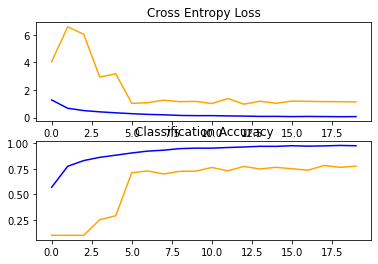

In [ ]:
summarize_diagnostics(resnet_history)

# Custom CNN

1. Comparing both the Cross Entropy Loss and Accuracy on Train and Test dataset

2. Bluse line corresponds to the train dataset 

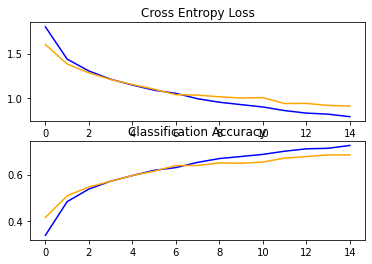

In [ ]:
summarize_diagnostics(cnn_history)

- Using Custom CNN model, test data accuracy is $66\%$ 

- Using ResNet CNN model, $77.63\%$

The reason why I feel ResNet did not improved much on the CIFAR-10 dataset is. CIFAR images re 32× 32 and ResNet50 uses total of five stride-2 convoltuion, which mean it downsamples images by a factor of 32. So after the five stride-2 convoltions the feature map will be of size 1 x 1. So we need to reduce the stride=2 convolutions or upsamples the images